Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Marnix van der Pouw, 2013687"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam September 21st, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam September 21, 2018".



## Generating and plotting data

We start by importing the usual libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

#### a) [0.5 point] Explain in words what the following code does. 

In [3]:
n_observations = 100
x = np.random.uniform(0,2,size=n_observations)
df = pd.DataFrame({'x': x})

##### In the first line, the 'amount of observations' (n_observations) is set as 100. In the second line, we create a random variable x, in which 100 (n_observations) numbers between 0 (low) and 2 (high) are uniformly randomly distributed. In the third line, we create a dataframe with pandas. It will have 100 rows of numbers between 0 and 2 (the x in the brackets, which refers to the second line), and 1 column called x (the 'x' in the brackets).

Now we are going to add some columns to the dataframe `df`.

#### b) [0.5 points] Add two columns to the data frame: (i) column `y` where $y=3*x+5$ and (ii) column `z` where $z = (x-1)^2$.

In [4]:
def y(x):
    y = 3*x + 5
    return y

def z(x):
    z = (x-1)**2
    return z

df['y'] = df['x'].apply(y)
df['z'] = df['x'].apply(z)

df.describe

<bound method NDFrame.describe of            x          y         z
0   0.753647   7.260941  0.060690
1   1.777485  10.332456  0.604483
2   1.501241   9.503724  0.251243
3   0.666238   6.998714  0.111397
4   0.258567   5.775701  0.549723
5   1.713565  10.140694  0.509174
6   1.296889   8.890667  0.088143
7   1.744370  10.233111  0.554087
8   0.411962   6.235885  0.345789
9   0.867662   7.602985  0.017513
10  1.791640  10.374921  0.626694
11  0.620476   6.861427  0.144039
12  0.985112   7.955336  0.000222
13  0.897217   7.691652  0.010564
14  0.091235   5.273706  0.825853
15  1.192840   8.578521  0.037187
16  1.087505   8.262516  0.007657
17  0.341829   6.025486  0.433190
18  1.783099  10.349298  0.613244
19  1.431764   9.295293  0.186420
20  1.270201   8.810603  0.073009
21  1.305731   8.917194  0.093472
22  1.445791   9.337372  0.198729
23  1.991018  10.973053  0.982116
24  1.875387  10.626162  0.766303
25  0.798127   7.394380  0.040753
26  1.940187  10.820561  0.883951
27  1.498437  

#### c) [0.5 point] Calculate the means and standard deviations for `x` and `y`. 

[hint: you can do this with one command or with four separate commands]

In [5]:
meanx = df['x'].mean(axis=0) # Mean of x
print(meanx)
meany = df['y'].mean(axis=0) # Mean of y
print(meany)
sdx = df['x'].std(axis=0) # Standard deviation of x
print(sdx)
sdy = df['y'].std(axis=0) # Standard deviation of y
print(sdy)

1.0183780049278799
8.055134014783642
0.581778130229475
1.7453343906884253


#### d) [0.5 points] Use your knowledge of statistics to explain the relations (i) between the means of `x` and `y` and (ii) between the standard deviations of `x` and `y`.

In [6]:
hypotheticalmeany = meanx*3 + 5
print(hypotheticalmeany)
# This gives the mean of y as answer, which is correct, as the function of y is 3x + 5.

hypotheticalsdy = sdx*3
print(hypotheticalsdy)
# This gives the standard deviation of y as answer, which is correct, as the derivative of y is 3, which
# would be the amount we would need to multiply the standard deviation of x with, to find the standard deviation of y.

8.05513401478364
1.7453343906884249


#### e) [1 point] Plot a histogram of `x` with fractions (not absolute numbers) on the vertical axis. Add the label $x$ to the horizontal axis.

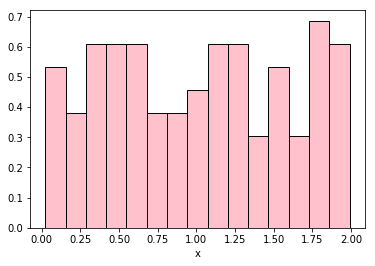

In [7]:
plt.hist(x, normed=1, bins=15, facecolor='pink', alpha=8, edgecolor='black')
plt.xlabel("x")
plt.show()

#### f) [0.5 points] Make a scatter plot of `y` vs `z` with the label $y$ on the horizontal axis and the label $z$ on the vertical axis.

Text(0,0.5,'z')

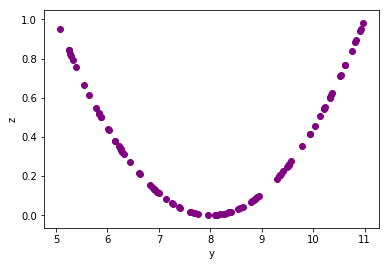

In [8]:
plt.scatter(df['y'], df['z'], color='purple')
plt.xlabel("y")
plt.ylabel("z")

This relation looks rather "perfect". We want to make a "noisy" version of this graph.

#### g) [0.5 points] Create a variable `z2` equal to `z` but with some "noise" added to it. That is, add a random variable (vector) with mean 0 to `z` to get `z2`. Then plot `y` against `z2`. Adjust the standard deviation of the "noise" variable such that the shape of the figure under f) can still be recognized but not perfectly.

[hint: under a) you have seen the library that contains functions to create a "noisy variable"]

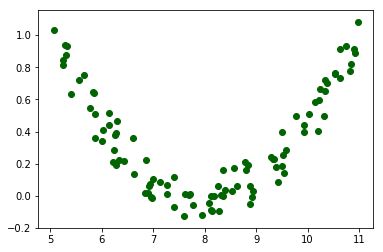

In [9]:
z1 = np.random.uniform(-0.15,0.15,100)

df['z1'] = z1

df['z2'] = df['z']+df['z1']

plt.scatter(df['y'], df['z2'], color='darkgreen')

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.